In [174]:
import pandas as pd
import numpy as np
# CSV 파일 불러오기
senti_df = pd.read_csv("/Users/Shared/최종선_교수님/Face_skin_disease/감성분석/감성사전/senti_labeled_df.csv")
ntoken_df = pd.read_csv("/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/Ntoken_review.csv")


In [175]:
senti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sen          1094 non-null   object 
 1   pos_neg      1094 non-null   float64
 2   sen2         1094 non-null   object 
 3   senti_score  1094 non-null   int64  
 4   pred         1094 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 42.9+ KB


In [176]:
ntoken_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_name    1094 non-null   object
 1   reviewer_id     1094 non-null   object
 2   skin_type       606 non-null    object
 3   skin_tone       480 non-null    object
 4   skin_concern_1  470 non-null    object
 5   skin_concern_2  380 non-null    object
 6   rating          1094 non-null   int64 
 7   review_date     1094 non-null   object
 8   review          1094 non-null   object
 9   tokens          1094 non-null   object
 10  Ntoken_review   1094 non-null   object
dtypes: int64(1), object(10)
memory usage: 94.1+ KB


In [177]:
# senti_labeled_df.csv 의 pred 열만 추출
pred_col = senti_df[["pred"]]

# 두 데이터프레임 합치기 (인덱스 기준)
merged_df = pd.concat([ntoken_df, pred_col], axis=1)

# 결과 저장
merged_df.to_csv("merged_output.csv", index=False)

print("병합 완료! merged_output.csv 생성됨.")

병합 완료! merged_output.csv 생성됨.


In [178]:
merged_df.head()

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,rating,review_date,review,tokens,Ntoken_review,pred
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,5,2025.07.24,닥터지 더모이스처 배리어 인텐스크림 제가 이 제품을 사용하고 이렇게 오랜기간...,"[('닥터', 'NNP'), ('지', 'NNB'), ('더', 'MAG'), ('...","['닥터', '이스', '리어', '스크림', '제가', '제품', '사용', '기...",0
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다 화장 잘 뜨고 각질 많이 일어나...,"[('악건성', 'NNG'), ('이', 'VCP'), ('ㄴ데', 'EC'), (...","['악건성', '화장', '크림', '화장', '각질', '건성', '정말', '정...",0
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,NaN,NaN,NaN,NaN,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...,"[('현직', 'NNG'), ('메', 'NNG'), ('컵', 'NNG'), ('...","['현직', '아티스트', '기초', '선크림', '직전', '흡수', '선크림',...",0
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요,"[('보습', 'NNG'), ('필요', 'NNG'), ('하', 'XSV'), (...","['보습', '필요', '사용', '보습', '필요']",1
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요 그래서 저는 아토피 올라오는...,"[('다른', 'MM'), ('크림', 'NNG'), ('들', 'XSN'), ('...","['크림', '비교', '가려움', '효과', '아토피', '부분', '세라마이드'...",0


In [179]:
merged_df['rating'].nunique(), merged_df['pred'].nunique(), merged_df['review'].nunique()

(5, 2, 1094)

In [180]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=111)
print(f"훈련 데이터 크기: {len(train_data)}")
print(f"테스트 데이터 크기: {len(test_data)}")
 

훈련 데이터 크기: 875
테스트 데이터 크기: 219


### 레이블의 분포 확인

<Axes: title={'center': 'Train Data Label Distribution'}, xlabel='pred'>

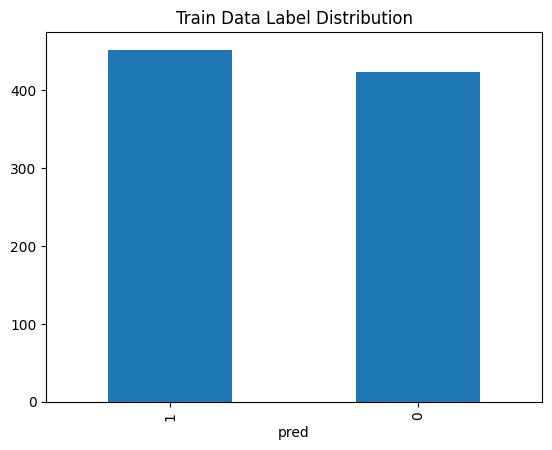

In [181]:
train_data['pred'].value_counts().plot(kind='bar', title='Train Data Label Distribution')

In [182]:
train_data.groupby('pred').size().reset_index(name='count').sort_values(by='pred')

,pred,count
0,0,423
1,1,452


### 데이터 정제

In [183]:
train_data['review'] = train_data['review'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
train_data['review'].replace('', np.nan, inplace=True)
print(len(train_data))

875


/var/folders/ts/g7dt7hs11lvb1n__nmfls1hw0000gn/T/ipykernel_15431/1892574274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['review'].replace('', np.nan, inplace=True)


In [184]:
test_data['review'] = test_data['review'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test_data['review'].replace('', np.nan, inplace=True)
print(len(test_data))

219


/var/folders/ts/g7dt7hs11lvb1n__nmfls1hw0000gn/T/ipykernel_15431/3028635424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['review'].replace('', np.nan, inplace=True)


## 토큰화 및 불용어 제거 

In [185]:
with open('/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/stopwords.txt', 'r', encoding='utf-8') as f:
    lines = f.read().splitlines()
    stopwords = [line.rstrip('\n') for line in lines]

In [186]:
from konlpy.tag import Okt
okt = Okt()
print(okt.pos("트위터 기반 분석기입니다."))

[('트위터', 'Noun'), ('기반', 'Noun'), ('분석', 'Noun'), ('기입', 'Noun'), ('니', 'Noun'), ('다', 'Josa'), ('.', 'Punctuation')]


In [187]:
train_data['review'] = train_data['review'].apply(okt.morphs)
train_data['review'] = train_data['review'].apply(lambda x: [word for word in x if word not in stopwords])

In [188]:
test_data['review'] = test_data['review'].apply(okt.morphs)
test_data['review'] = test_data['review'].apply(lambda x: [word for word in x if word not in stopwords])

In [189]:
X_train = train_data['review'].values
y_train = train_data['pred'].values
X_test = test_data['review'].values
y_test = test_data['pred'].values
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(875,)
(875,)
(219,)
(219,)


In [190]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [191]:
## 빈도 수가 낮은 단어 제거
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [192]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0  
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('전체 단어 개수 :', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold - 1, rare_cnt))
print('희귀 단어 비율 : {}'.format((rare_cnt / words_cnt)*100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq / words_freq)*100))

전체 단어 개수 : 5843
빈도가 2 이하인 희귀 단어 수 : 4222
희귀 단어 비율 : 72.25740201951054
희귀 단어 등장 빈도 비율 : 14.732786258419365


In [193]:
vocab_size = words_cnt - rare_cnt + 2 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 1623


In [194]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [195]:
print(X_train[:3])
print(X_test[:3])

[[1, 891, 91, 334, 7, 687, 1, 8, 479, 448, 776, 3, 1, 335, 9, 1, 1, 1, 1], [132, 151, 37, 777, 14, 248, 103, 2, 20, 6, 128, 16, 12], [249, 522, 3, 27, 2, 778, 53, 108, 226, 1, 1, 400, 3, 38, 1028, 144, 1028, 59, 176, 94, 892, 321, 1, 63, 893, 1, 1, 106, 3, 6, 618, 2, 227, 1, 272, 1, 1, 301, 57, 894, 1, 18, 28, 779, 195, 26, 421, 184, 30, 250, 422, 21, 4, 289, 58, 64, 568, 273, 81, 1029, 9, 1030, 115, 27]]
[[22, 147, 80, 760, 7, 68, 31, 48, 1463, 1, 56, 57, 18, 894, 1, 10, 35, 3, 27, 266, 117, 1, 1, 1, 13, 301, 18, 1, 547, 13, 36, 70, 318, 680, 5, 76, 10, 186], [198, 1167, 21, 7, 9, 518, 69, 23, 98, 94, 5, 1], [3, 2, 81, 1055, 83, 1492, 1493, 13, 386, 3, 2, 1425, 1070, 179, 13, 745, 1, 1202, 65, 226, 25, 1481, 249, 44, 166, 52, 2, 410, 4, 289, 846, 1, 40, 93, 573, 10, 450, 372, 4, 142, 42, 1, 58, 29, 482, 979, 1, 16, 30, 58, 116, 103, 49, 57, 24, 1, 671, 237]]


### 패딩

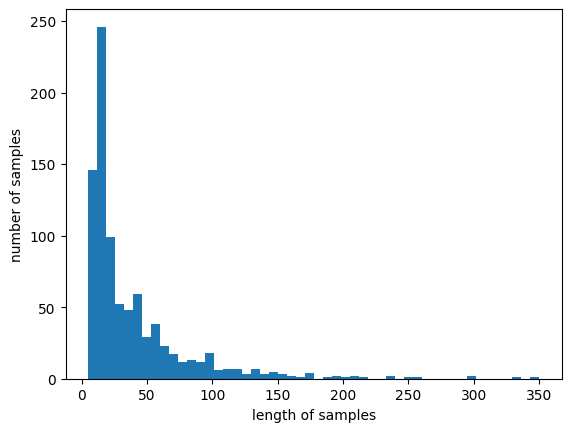

In [196]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [197]:
max_len = 60

In [198]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [199]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

### 모델 구축 및 학습

In [200]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [201]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [202]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)    

In [203]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, callbacks=[es, mc], batch_size=60, validation_split=0.2)    


Epoch 1/30


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.4792 - loss: 0.6938
Epoch 1: val_acc improved from -inf to 0.57714, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - acc: 0.4802 - loss: 0.6937 - val_acc: 0.5771 - val_loss: 0.6881
Epoch 2/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.6294 - loss: 0.6859
Epoch 2: val_acc did not improve from 0.57714
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - acc: 0.6253 - loss: 0.6857 - val_acc: 0.5600 - val_loss: 0.6828
Epoch 3/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.6186 - loss: 0.6737
Epoch 3: val_acc did not improve from 0.57714
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - acc: 0.6223 - loss: 0.6729 - val_acc: 0.5543 - val_loss: 0.6751
Epoch 4/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - acc: 0.6618 - loss: 0.6385
Epoch 4: val_acc improved from 0.57714 to 0.61714, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - acc: 0.6655 - loss: 0.6366 - val_acc: 0.6171 - val_loss: 0.6613
Epoch 5/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.7675 - loss: 0.5427
Epoch 5: val_acc did not improve from 0.61714
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - acc: 0.7637 - loss: 0.5425 - val_acc: 0.6171 - val_loss: 0.6917
Epoch 6/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.7708 - loss: 0.5385
Epoch 6: val_acc improved from 0.61714 to 0.64571, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - acc: 0.7694 - loss: 0.5378 - val_acc: 0.6457 - val_loss: 0.6540
Epoch 7/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.8171 - loss: 0.4338
Epoch 7: val_acc did not improve from 0.64571
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - acc: 0.8165 - loss: 0.4327 - val_acc: 0.6114 - val_loss: 0.7034
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - acc: 0.8569 - loss: 0.3563
Epoch 8: val_acc did not improve from 0.64571
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - acc: 0.8563 - loss: 0.3565 - val_acc: 0.6400 - val_loss: 0.7512
Epoch 9/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.8801 - loss: 0.2851
Epoch 9: val_acc did not improve from 0.64571
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - acc: 0.8792 - loss: 0.2872 - val_acc: 0.6171 - val_loss: 0.8279
Epoch 10/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - acc: 0.9048 - loss: 0.2396
Epoch 10: val_acc did not improve from 0.64571
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - acc: 0.9043 - loss: 0.2410 -

In [204]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6011 - loss: 0.6649  


[0.6548099517822266, 0.6164383292198181]

### 시각화

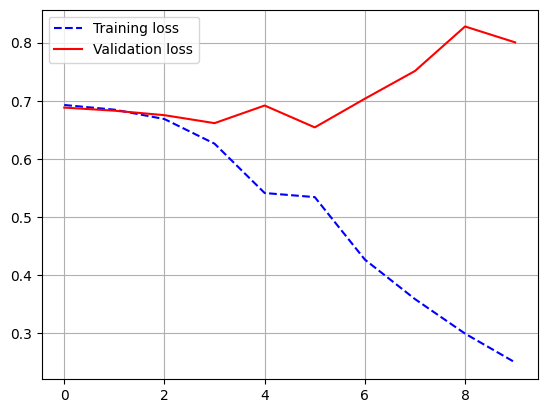

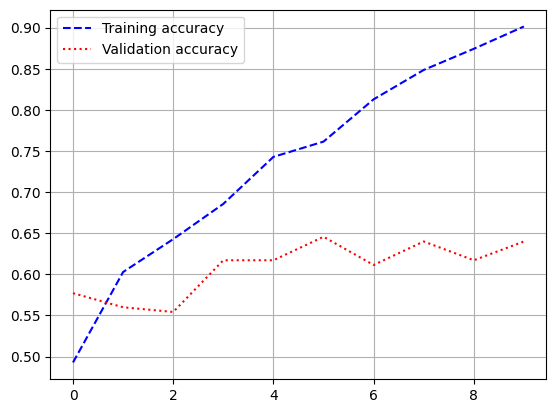

In [205]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='Training loss')
plt.plot(val_loss, 'r-', label='Validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='Training accuracy')
plt.plot(val_acc, 'r:', label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

### 감정 예측 

In [206]:
def sentiment_predict(new_sentence):
    new_token = [word for word in okt.morphs(new_sentence) if not word in stopwords]
    new_token = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_token, maxlen = max_len)
    score = float(loaded_model.predict(new_pad))
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [223]:
sentiment_predict('싫어요')
sentiment_predict('이건 정말 리뷰 쓰는게 아깝네요 보지마세요')
sentiment_predict('처음 써봤는데 정말 재미있어요. 강력 추천합니다. 꼭 사용해보세요')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
90.61% 확률로 긍정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
70.15% 확률로 부정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
65.91% 확률로 긍정 리뷰입니다.


/var/folders/ts/g7dt7hs11lvb1n__nmfls1hw0000gn/T/ipykernel_15431/2119900483.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(new_pad))


In [226]:
sentiment_predict('이건 정말 쓰레기에요')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
76.74% 확률로 긍정 리뷰입니다.


/var/folders/ts/g7dt7hs11lvb1n__nmfls1hw0000gn/T/ipykernel_15431/2119900483.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(new_pad))
